<img src="https://cdn-japantimes.com/wp-content/uploads/2020/12/np_file_55220.jpeg" width="500px">

# **In this article, I will be walking you through the statistics of suicides numbers over the years. Hoping to find any patterns/relationship I can**  
### **From there, we are going to extend out to sorting by countries, where we will be looking for a reason behind the suicide rates of countries.**
* I believe I have laid out my analysis and employed creative methods to compare and seek out a reason so I do hope you read on to find out for yourself some **interesting facts** 
* Some upvotes and comments would be hugely appreciated as I seek to cotinuously improve myself and bring data more readable to more people. Thank you!! 

#### Let us start by importing some libraries 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statistics
from IPython.display import Image

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/who-suicide-statistics/who_suicide_statistics.csv
/kaggle/input/suicide/japan-covid-commuters.jpg
/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


In [2]:
df = pd.read_csv("../input/who-suicide-statistics/who_suicide_statistics.csv", infer_datetime_format=True)
happy_df = pd.read_csv("../input/world-happiness/2016.csv")
gdp_df_2015 = pd.read_csv('../input/world-happiness/2015.csv')

In [3]:
df_country_by_year = df.groupby(['country', 'year']).sum()

#### Shall we start off this analysis by looking at the historical trend of suicides number throughout the globe? 

<AxesSubplot:xlabel='year'>

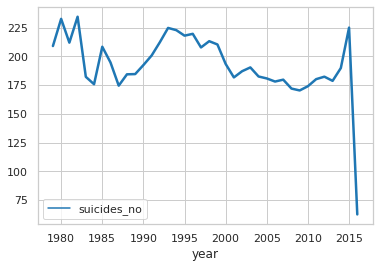

In [4]:
#print(df[['year','suicides_no']].dropna().groupby('year').mean())
number_of_deaths_over_the_years = df[['year','suicides_no']].groupby('year').mean()
sns.set_theme(style="whitegrid")
sns.lineplot(data=number_of_deaths_over_the_years, palette="tab10", linewidth=2.5)

#### Why is there a sudden drop in 2016? 

In [5]:
dropin2016 = df.loc[df['year'] == 2016]
print(dropin2016.isna().sum())

country         0
year            0
sex             0
age             0
suicides_no    36
population     48
dtype: int64


#### As we can see, there are some null values of suicides_no in 2016, so that could be a potential reason for the sudden drop

In [6]:
df['suicides_no'].isnull().groupby(df['year']).sum().to_dict()

{1979: 228,
 1980: 144,
 1981: 156,
 1982: 156,
 1983: 276,
 1984: 132,
 1985: 132,
 1986: 108,
 1987: 60,
 1988: 72,
 1989: 48,
 1990: 60,
 1991: 72,
 1992: 36,
 1993: 36,
 1994: 36,
 1995: 24,
 1996: 12,
 1997: 12,
 1998: 12,
 1999: 0,
 2000: 0,
 2001: 0,
 2002: 24,
 2003: 24,
 2004: 36,
 2005: 60,
 2006: 24,
 2007: 0,
 2008: 12,
 2009: 0,
 2010: 12,
 2011: 48,
 2012: 48,
 2013: 36,
 2014: 48,
 2015: 36,
 2016: 36}

#### But as we can see from here, the amount of null values of suicides numbers in 2016 (36) compared to other years is relatively low. So there must be some other reason beyond this data set 

# **Now lets proceed onto see classification of countries**

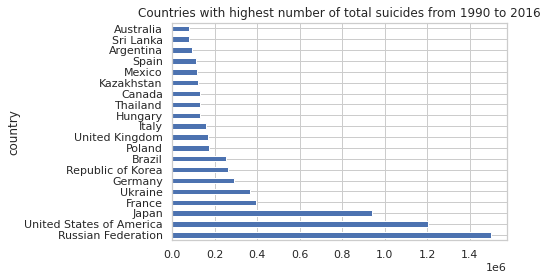

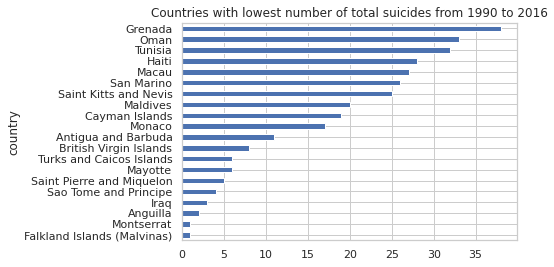

In [7]:
country_overall_largest = df['suicides_no'].dropna().groupby(df['country']).sum().nlargest(20)
country_overall_smallest = df['suicides_no'].dropna().groupby(df['country']).sum().nsmallest(20)
country_overall_largest.plot(kind='barh', title ='Countries with highest number of total suicides from 1990 to 2016')
plt.show()
country_overall_smallest.plot(kind='barh', title ='Countries with lowest number of total suicides from 1990 to 2016')
plt.show()


**These are the top 20 and bottom 20 countries in suicides numbers in total through 1990 to 2016**


#### Now lets look at the 2016 suicide numbers


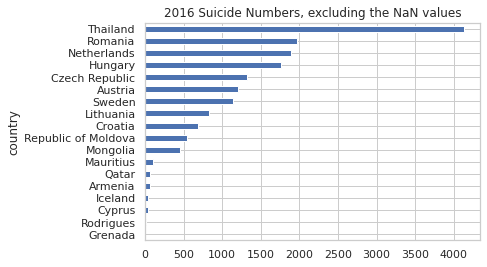

In [8]:
year = df[df['year'] == 2016].dropna()
year_dict=year['suicides_no'].groupby(year['country']).sum().to_dict()   

year2016df = year['suicides_no'].groupby(year['country']).sum().sort_values()
year2016df.plot(kind='barh',title='2016 Suicide Numbers, excluding the NaN values')
plt.xlabel='Number of Suicides'

#### We can tell that Thailand has the highest amount of suicide numbers. Now, with this in mind, let us take another step 

# **Let us do some analysis with 2016 happiness ranking report to possibly explain the table we see above**

#### Let us compare the 2016 suicide data with the 2016 happiness ranking data as shown below


<AxesSubplot:title={'center':'2016 Happiness Ranking'}, ylabel='Country'>

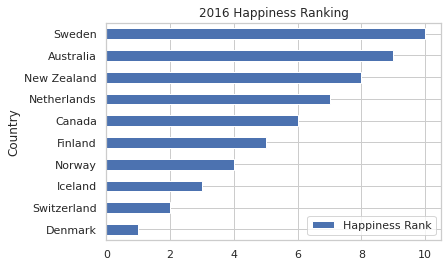

In [9]:
copy_happy_df = happy_df.copy()
happiness_rank = copy_happy_df[['Country','Happiness Rank']].set_index(happy_df['Country'])
happiness_rank.nsmallest(10,'Happiness Rank').plot(kind='barh',title = '2016 Happiness Ranking')

#### Let us filter out the countries that are not named in the **2016 Suicide Numbers chart**

Grenada cannot be found in happiness_rank
Republic of Moldova cannot be found in happiness_rank
Rodrigues cannot be found in happiness_rank

These are the countries that cannot be found in the report for happiness ranking


<AxesSubplot:>

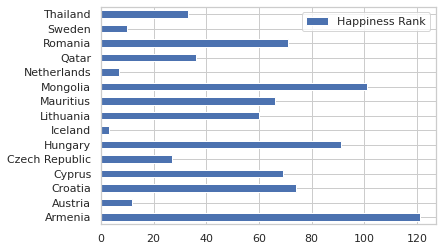

In [10]:
happy_dict = {}
for key in year_dict:
    if key in happiness_rank['Country'].values:
        happy_dict["{}".format(key)] = happiness_rank.loc[key]
    else:
        print("{} cannot be found in happiness_rank".format(key))
        continue
print("")
print("These are the countries that cannot be found in the report for happiness ranking")
dfwithdatabothsuicideandhappiness = pd.DataFrame.from_dict(happy_dict,orient='index')
df_happiness = pd.DataFrame.from_dict(happy_dict,orient='index')


df_happiness.plot(kind='barh')

#df_happiness is the DF with countries with their happiness rankings 

### **This the table of Happiness Rankings of countries displayed in the 2016 suicide numbers chart**
*  We have taken out 3 countries that couldn't be found in the Happiness Rank Data set (Grenada, Republic of Moldova, Rodrigues)

#### **But to compare, we would need to look at the 2016 suicide numbers chart relative to each country's population size** 
#### If not, it won't be a fair analysis, such as comparing Armenia and Thailand 

*  For example, Armenia is 121 in the happiness rank, but they have about 50 in suicide numbers. 
*  Thailand is 33 in the happiness rank, but they have around 4200 in suicide numbers
*  This may be a result of the difference in the population size of both countries 

### **So let us look at the proportion of the number of suicides compared to its population** 

In [11]:
#print(year2016df.sort_index())
year_2016_populationsize = year['population'].groupby(year['country']).sum().sort_values()
#print(year_2016_populationsize.sort_index())
#print(year2016df.sort_index() / year_2016_populationsize.sort_index())
suicides_proportion_2016_inpercentage = (year2016df.sort_index() / year_2016_populationsize.sort_index()) *100

Text(0, 0.5, 'suicide rate in %')

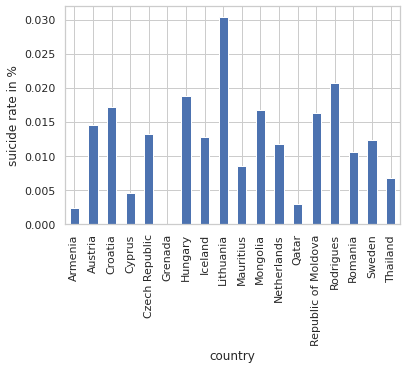

In [12]:
suicides_proportion_2016_inpercentage.plot(kind='bar')
plt.ylabel("suicide rate in %")

### Above is the plot of suicides proportion compared to its total population in 2016 for the selected countries

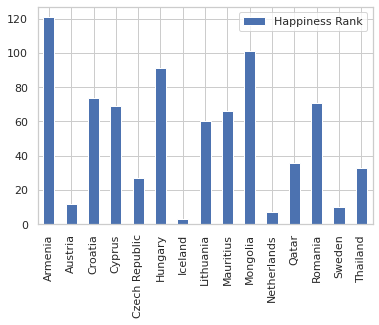

In [13]:
df_happiness.sort_index().plot(kind='bar')
sorted_df_happiness = df_happiness.sort_index()

### Above is the plot of happiness ranking in 2016 for the selected countries

#### Let us plot the proportion in percentage and the happiness rank to observe their relationship 


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


<AxesSubplot:>

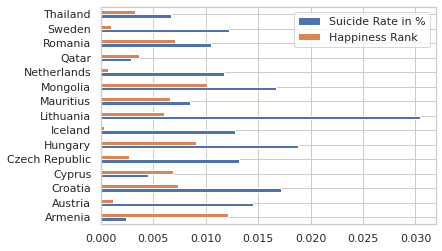

In [14]:
#suicides_proportion_2016_inpercentage.join(df_happiness.sort_index()['Happiness Rank'])

result = pd.concat([suicides_proportion_2016_inpercentage,sorted_df_happiness['Happiness Rank']], axis=1)
cleaned_result = result.dropna()
cleaned_result.iloc[:,1] = cleaned_result['Happiness Rank'] / 10000
cleaned_result = cleaned_result.rename(columns={0: 'Suicide Rate in %'})
cleaned_result.plot(kind='barh')
#print(suicides_proportion_2016_inpercentage.sort_values().reset_index()) 
#print(sorted_df_happiness['Happiness Rank'].sort_values().reset_index()) 



*  I have divided the Happiness Ranking by 10000 to make it visible on the chart


### **The blue line represents Suicide Proportion in percentage and the orange line represents Happiness Ranking** 

*  It could be expected that the lower the Happiness ranking, the lower the suicide proportion too; a rather straightforward relationship. 

*  However, by looking at this chart, it is difficult to determine straightaway whether there is a relationship between suicide rate and happiness ranking as both of them are not represented using the same units 

### **Thus, I have decided to sort the countries by their blue and orange values into 2 different lists and check for their differences in their index numbers to see whether the difference is significant**
*  If so, it would mean that there is not a direct relationship; and this would not be proving that happiness ranking is directly related to suicide rate 



In [15]:
df_1 = suicides_proportion_2016_inpercentage.sort_values().reset_index()
df_2 = sorted_df_happiness['Happiness Rank'].sort_values().reset_index()

dict_1 = suicides_proportion_2016_inpercentage.sort_values().to_dict()
dict_2 = sorted_df_happiness['Happiness Rank'].sort_values().to_dict()

#print(df_1)
#print(df_2)

list_of_diff = [] 
for i in range (18):
    for j in range(15):
        if df_1['country'][i] == df_2['index'][j]:
            value = abs(i-j)
            list_of_diff.append(value)
        else:
            continue 
            
print(round(statistics.mean(list_of_diff),2))

5.47


#### A value of 5.47 shows that on average, the difference of the index of a single country in the two different lists are 5.47, which seems to be notable high.
#### As can be seen by the value 5.47, we can conclude as such (below)

### <font color='red'>So it can be reasonably concluded that there is no clear direct relation between happiness ranking and suicide rate of select countries (in 2016)</font>

#### Then maybe there is some other reasons
# **Let us take a look at GDP Per Capita of the selected countries and compare** 

                 Country  GDP/Capita
Country                             
Denmark          Denmark     1.44178
Switzerland  Switzerland     1.52733
Iceland          Iceland     1.42666
Norway            Norway     1.57744
Finland          Finland     1.40598
...                  ...         ...
Benin              Benin     0.39499
Afghanistan  Afghanistan     0.38227
Togo                Togo     0.28123
Syria              Syria     0.74719
Burundi          Burundi     0.06831

[157 rows x 2 columns]
Grenada cannot be found in GDP_rank
Republic of Moldova cannot be found in GDP_rank
Rodrigues cannot be found in GDP_rank

These are the countries that cannot be found in the report
                Suicide Rate in %  GDP/Capita
Armenia                  0.002407     0.86086
Austria                  0.014473     1.45038
Croatia                  0.017169     1.18649
Cyprus                   0.004483     1.31857
Czech Republic           0.013163     1.30915
Hungary                  0.018833    

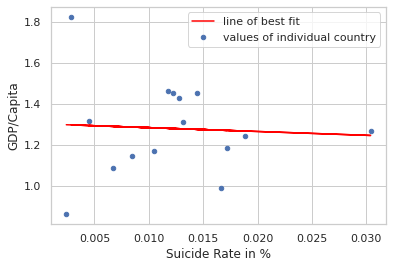

The gradient value is -1.867


In [16]:
GDP_rank = copy_happy_df[['Country','Economy (GDP per Capita)']].set_index(happy_df['Country'])
GDP_rank = GDP_rank.rename(columns={'Economy (GDP per Capita)': 'GDP/Capita'})
print(GDP_rank)
GDP_dict = {}
for key in year_dict:
    if key in GDP_rank['Country'].values:
        GDP_dict["{}".format(key)] = GDP_rank.loc[key]
    else:
        print("{} cannot be found in GDP_rank".format(key))
        continue
print("")
print("These are the countries that cannot be found in the report")

GDP_rank_countries = pd.DataFrame.from_dict(GDP_dict,orient='index')

#print(GDP_rank_countries)


result = pd.concat([suicides_proportion_2016_inpercentage,GDP_rank_countries['GDP/Capita']], axis=1)
result = result.rename(columns={0: 'Suicide Rate in %'})
result = result.dropna()
print(result)
result.plot(x='Suicide Rate in %', y='GDP/Capita', kind='scatter',label='values of individual country')
m,b = np.polyfit(x=result.iloc[:, 0], y=result.iloc[:, 1], deg=1)
plt.plot(result.iloc[:,0], m*(result.iloc[:,0]) + b,c='red',label='line of best fit')
plt.legend()
#print(m,b)
plt.show()

print("The gradient value is", round(m,3))

*  Above is the chart showing the scattered values for different countries. 
*  The common belief is that the higher the GDP/Capita, the lower the suicide rate, proving an inversely proportionate relationship.
*  As can be seen from the gradient of the line of best fit (-1.867), it can be concluded that there indeed is an inversely proportionate relationship. 

### <font color='red'>So it can be reasonably concluded that there is an inversely proportionate relationship between GDP/Capita of countries and its suicide rate (in 2016)</font>
*  However, the degree of the inversely proportionate relationship deserves our attention. 
*  A value of 1.867 which is quite close to 2 shows that a change in GDP/Capita calls for a greater change in the value of suicide rate in countries, almost 2 times the change. 

### <font color='red'>Thus I conclude that GDP/Capita plays a significant role in influencing the suicide rate in countries</font>

## In conclusion, in this analysis, we arrived at some conclusions. Suicide Rate is highly affected by GDP/Capita but don't have a direct relationship with happiness ranking. 
*  However, the data set shows that there are some errors which can be seen from the drop in 2016 suicide numbers drastically, so our analysis might not be of the greatest accuracy. 